Data Link: https://www.kaggle.com/quantbruce/real-estate-price-prediction

Description:
This dataset is a real estate price prediction. Here are 7 va in this dataset, they are No, transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude, price of unit area

In [1]:
# import libraries to analysis the data and definite functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import DataFrame as df

In [2]:
# import data_file 
data_file=r"hotel_bookings-Holt Winters.csv"
data = np.genfromtxt(data_file, dtype=None, delimiter=",", names=True, encoding='ascii')


# First part:describe and explore the dataset

In [3]:
#describe the dataset
housedf=df(data)
housedf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
housedf.head

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [5]:
mean = housedf.mean()
mean.describe

<bound method NDFrame.describe of is_canceled                          0.370416
lead_time                          104.011416
arrival_date_year                 2016.156554
arrival_date_week_number            27.165173
arrival_date_day_of_month           15.798241
stays_in_weekend_nights              0.927599
stays_in_week_nights                 2.500302
adults                               1.856403
babies                               0.007949
is_repeated_guest                    0.031912
previous_cancellations               0.087118
previous_bookings_not_canceled       0.137097
booking_changes                      0.221124
days_in_waiting_list                 2.321149
adr                                101.831122
required_car_parking_spaces          0.062518
total_of_special_requests            0.571363
dtype: float64>

In [6]:
median=housedf.median()
median.describe

<bound method NDFrame.describe of is_canceled                          0.000
lead_time                           69.000
arrival_date_year                 2016.000
arrival_date_week_number            28.000
arrival_date_day_of_month           16.000
stays_in_weekend_nights              1.000
stays_in_week_nights                 2.000
adults                               2.000
babies                               0.000
is_repeated_guest                    0.000
previous_cancellations               0.000
previous_bookings_not_canceled       0.000
booking_changes                      0.000
days_in_waiting_list                 0.000
adr                                 94.575
required_car_parking_spaces          0.000
total_of_special_requests            0.000
dtype: float64>

In [7]:
housedf.shape

(119390, 32)

In [8]:
std=housedf.std()
std.describe

<bound method NDFrame.describe of is_canceled                         0.482918
lead_time                         106.863097
arrival_date_year                   0.707476
arrival_date_week_number           13.605138
arrival_date_day_of_month           8.780829
stays_in_weekend_nights             0.998613
stays_in_week_nights                1.908286
adults                              0.579261
babies                              0.097436
is_repeated_guest                   0.175767
previous_cancellations              0.844336
previous_bookings_not_canceled      1.497437
booking_changes                     0.652306
days_in_waiting_list               17.594721
adr                                50.535790
required_car_parking_spaces         0.245291
total_of_special_requests           0.792798
dtype: float64>

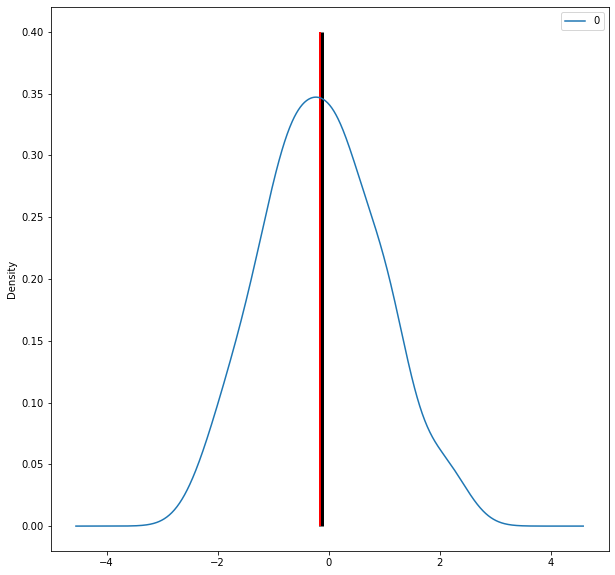

In [9]:
# test if the dataset is a norm distribution and explore the dataset
norm_data = pd.DataFrame(np.random.normal(size=100))
norm_data.plot(kind="density",
              figsize=(10,10))

plt.vlines(norm_data.mean(),     # Plot a black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot a red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")



The picture shows that this dataset is a normal distribution. 

# Second part: Data visualization

In [10]:
# relationship between transaction date and price
plt.scatter(housedf.X1_transaction_date, housedf.Y_house_price_of_unit_area)
plt.xlabel("date")
plt.ylabel("House Price")
plt.title("Relationship between date and house price")

AttributeError: 'DataFrame' object has no attribute 'X1_transaction_date'

This relationship is insignificant. 

In [ ]:
# relationship between house age and price
plt.scatter(housedf.X2_house_age, housedf.
Y_house_price_of_unit_area)
plt.xlabel("house age")
plt.ylabel("House Price")
plt.title("Relationship between house age and house price")

The relationship is not a linear regression

In [ ]:
# relationship between distance to the nearest MRT station and price
plt.scatter(housedf.X3_distance_to_the_nearest_MRT_station, housedf.Y_house_price_of_unit_area)
plt.xlabel("distance to MRT")
plt.ylabel("House Price")
plt.title("Relationship between distance to MRT and house price")

This is a negative correlation

In [ ]:
# relationship between number of convenience stores and price
plt.scatter(housedf.X4_number_of_convenience_stores, housedf.Y_house_price_of_unit_area)
plt.xlabel("number of convenient stores")
plt.ylabel("House Price")
plt.title("Relationship between numbers of convenient stores and house price")

This is a positive correlation

In [ ]:
# relationship between latitudes and price
plt.scatter(housedf.X5_latitude, housedf.Y_house_price_of_unit_area)
plt.xlabel("latitude")
plt.ylabel("House Price")
plt.title("Relationship between latitude and house price")


This is not a linear relationship

In [ ]:
# relationship between longitude and price
plt.scatter(housedf.X6_longitude, housedf.Y_house_price_of_unit_area)
plt.xlabel("longitude")
plt.ylabel("House Price")
plt.title("Relationship between longitude and house price")

This is not a linear relationship

In [ ]:
# Then, plot scatterplots to see the pair relationship
housedf_sub = housedf.drop(['No'], axis=1)
sns.pairplot(housedf_sub);

From pairs to pairs analysis, the obvious linear relationship is convenient stores & price and distance to the nearest MRT station & price.
More convenient stores will increase the house price.
Less distance to prt station will increase the house price. 
It shows that people will more prefer a place with more convenient shops and near to the mrt station. 

# Part three: calculate the MLR

Y=house price of unit area, X=all variable
Using all variable to fit the linear regression and predict the price of house unit area. 

In [ ]:
#use skylearn to calculate
from sklearn.linear_model import LinearRegression
#create a LinearRegression object and drop the columns we don't need
X=housedf.drop(['No','X1_transaction_date','X2_house_age','X5_latitude','X6_longitude'],axis=1)
lm = LinearRegression()
lm

In [ ]:
# Use all 3 predictors to fit linear regression model
lm.fit(X, housedf.Y_house_price_of_unit_area)

In [ ]:
# Calculate the intercept
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

In [ ]:
#numbers of coefficients
print('Number of coefficients: {}'.format(len(lm.coef_)))

In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

In [ ]:
# Calculate the Model R Square 
lm.score(X, housedf.Y_house_price_of_unit_area)

# Part four: Prediction

In [ ]:
#Plot a histogram to predict the house price of unit area
plt.hist(lm.predict(X), bins=20)
plt.xlabel("Predicted price about unit area of house")
plt.ylabel("Frequency")
plt.title("Distribution of Observed house price");

In [ ]:
# plot histogram of observed prices
plt.hist(X.Y_house_price_of_unit_area, bins=20)
plt.xlabel("Observed price about unit area of house")
plt.ylabel("Frequency")
plt.title("Distribution of Observed house price");

In [ ]:
# plot relationship between observed and predicted prices
sns.regplot(x=lm.predict(X), y=X.Y_house_price_of_unit_area)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title(('Predicted vs observed house price'));

from the prediction model and R square, this model is a perfect model. 

# Part five: note

This model and R square is too perfect to let people believe, so we use OLS to calculate the MRL to test it again

In [ ]:
# import OLS function from StatsModels
from statsmodels.formula.api import ols
# using the fit model to calculate MLR
fit=ols('Y_house_price_of_unit_area~X4_number_of_convenience_stores+X3_distance_to_the_nearest_MRT_station',data=X).fit()
fit.summary()

the R square is 0.497, it is a medium fit degree. The coefficient about X4 and X5 is more realistic, so we decide to use the data from ols method.

# Part five: conclusion

 𝑌̂ 𝑖=𝛽̂ 0+𝛽̂ 1𝑋1+…𝛽̂ 13𝑋13
 Here Y=house price of unit area
 X1=distance to the nearest MRT station, coefficient=-0.0056
 X2=numbers of convenient stores, coefficient=1.1976
 intercept=39.1229
 We conclude that: Y=39.1229-0.0056X1+1.1976X2
